## **Summary**

Every year, more than 140 million bookings made on the internet and many hotel bookings made through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc. According to Google data, hotels are booked in advance of 12 weeks. 

This dataset contains 31 features about booking information such as Average Daily Rate, Arrival Time, Room Type, Special Request, etc. between 2015 and 2017 years.

In this kernel, I would like to show some booking information details with exploratory data analysis, some feature engineering, reviewing correlations between features, hyperparameter tunning and visualizing most important features and their interesting distribution properties. 
As a result of all these analyses, I aim to find best model to predict hotel booking cancellations with tree-based algorithms based on rest of the features found in the dataset. 
The goal of predictive analysis is to avoid overfitting and find the model that has the highest accuracy. 

## **INTRODUCTION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Import Data

hotel_data = pd.read_csv('../data/train.csv')

In [3]:
# Show first 10 rows

hotel_data.head(10)

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03
5,5,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,92.832887,0,0,Check-Out,2015-07-03
6,6,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,80.667361,0,0,Check-Out,2015-07-03
7,7,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,71.138396,0,0,Check-Out,2015-07-03
8,8,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,63.114261,0,0,Check-Out,2015-07-03
9,9,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,44.073611,0,0,Check-Out,2015-07-03


In [4]:
# Data summary

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91531 entries, 0 to 91530
Data columns (total 33 columns):
ID                                91531 non-null int64
hotel                             91531 non-null object
is_canceled                       91531 non-null int64
lead_time                         91531 non-null int64
arrival_date_year                 91531 non-null int64
arrival_date_month                91531 non-null object
arrival_date_week_number          91531 non-null int64
arrival_date_day_of_month         91531 non-null int64
stays_in_weekend_nights           91531 non-null int64
stays_in_week_nights              91531 non-null int64
adults                            91531 non-null int64
children                          91527 non-null float64
babies                            91531 non-null int64
meal                              91531 non-null object
country                           91063 non-null object
market_segment                    91531 non-null object
dist

## 1. Exploratory Data Analysis and Feature Engineering

In this part, I would like to visualize some features and show statistical relationship with target variable. This analysis will help to get overall view and deep familiarity of the data, detect extreme values and identify obvious errors. 

First graph is about exploring `hotel` feature which denotes type of the hotels. According to the below graph, approximately 34% of the data was booked for resort hotel and the rest of was booked for City Hotel. 

Text(0, 0.5, 'Count')

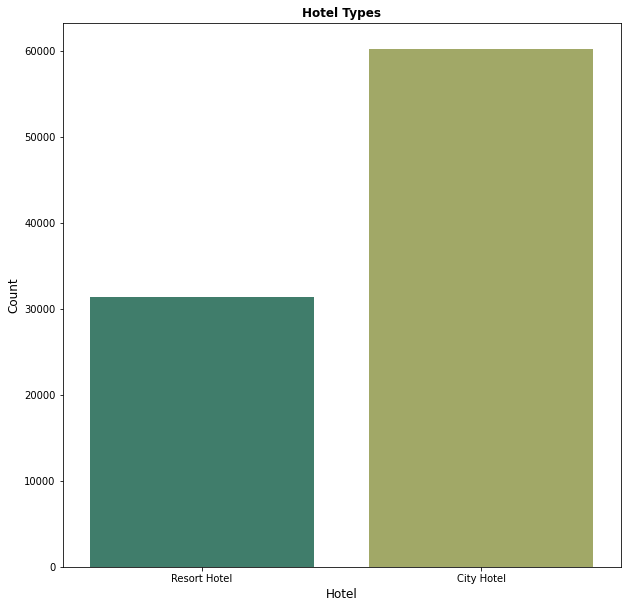

In [5]:
# Hotel types details

plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel_data, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Now, let's dive into the target value of data. The numbers are similar with hotel features. While 37% of booking canceled, 63% of booking is not canceled. These numbers also show that there is no balanced problem on the target value.  

Text(0, 0.5, 'Canceled or Not Canceled')

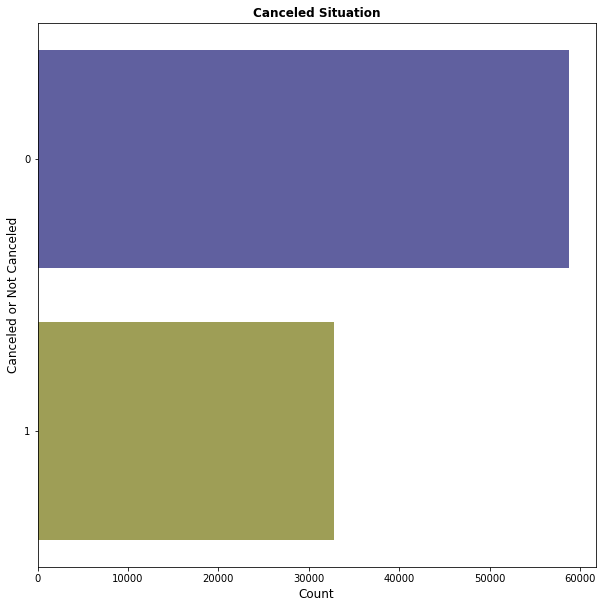

In [6]:
# `is_canceled` graph

plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= hotel_data, palette='gist_stern', orient = 'v')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

Below graph shows the relationship of `arrival_date_year` to `lead_time` with booking cancellation status. The graph created by violin plot. Violin plot is a hybrid of box plot and density plot. It shows the distribution of the data. 

Three violin plots are correponding to three different years. For canceled booking, means and interquartile ranges are similar in all years. But the shapes of the distributions are quite different from each other. On the other hand distribution of not-canceled booking are almost the same. 
For all years and every booking situation, the small number of large lead time values are pulling the mean up. It shows that the mean is higher than the median. 

Text(0, 0.5, 'Lead Time')

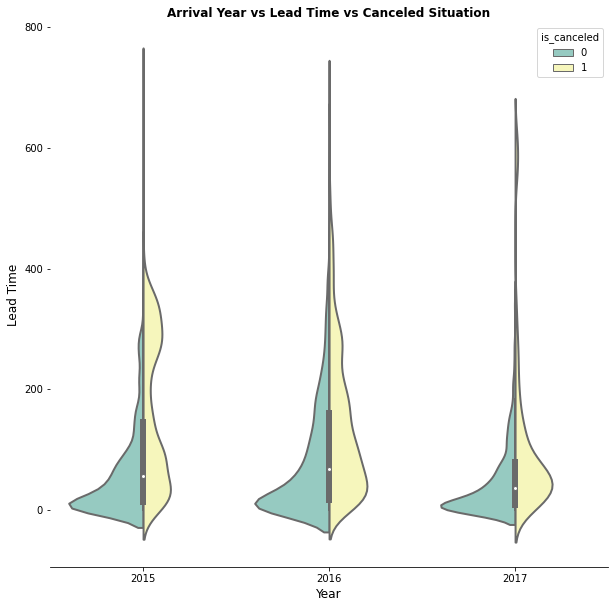

In [7]:
# `arrival_date_year` vs `lead_time` vs `is_canceled` exploration with violin plot

plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotel_data, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

Another exploration is made for the `arrival_date_month` feature. First month names converted to the numbers. It will help easier analysis. 

In [8]:
#`arrival_date_month` names converted to the numbers

hotel_data['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

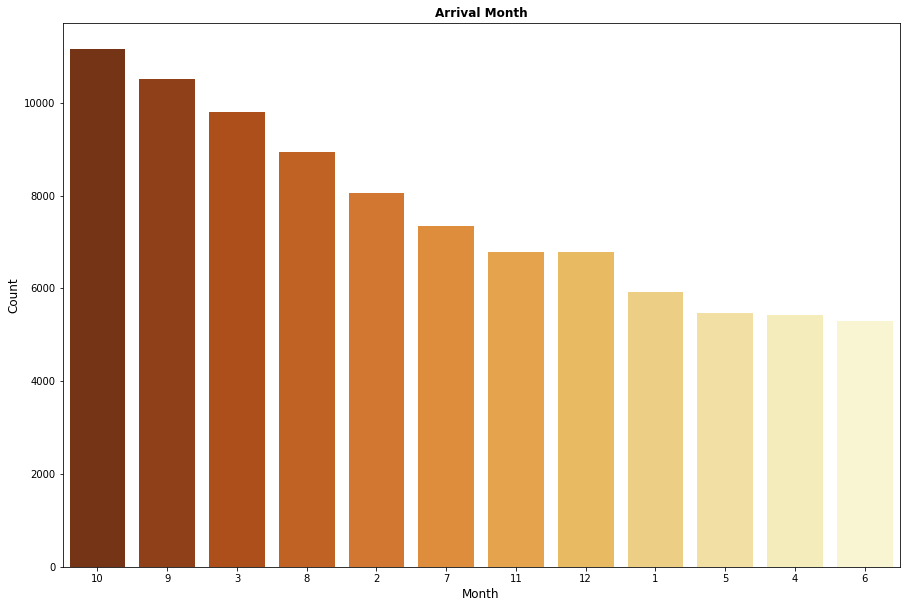

In [9]:
#`arrival_date_month` exploration 

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotel_data,
              order=pd.value_counts(hotel_data['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

The above graph is showing the number of bookings for each month. According to that, August is the busiest month and January is the most unoccupied month. It is half as busy as August.

Another important features which are related to time are `stays_in_week_nights` and `stays_in_weekend_night` features. The below table shows the relationship between these two features. According to that, there is some missing data. 715 values are inputted zero both weekend and weeknights. However, this missing data is small enough to neglect. 

In [10]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features

pd.crosstab(index = hotel_data['stays_in_week_nights'],columns=hotel_data['stays_in_weekend_nights'], margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,656,3645,1791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6092
1,13335,5928,4773,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24036
2,14780,6837,5007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26624
3,8532,4552,3348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16432
4,3219,1759,1968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6946
5,631,886,5975,245,58,0,0,0,0,0,0,0,0,0,0,0,0,7795
6,0,0,646,211,244,0,0,0,0,0,0,0,0,0,0,0,0,1101
7,0,0,327,278,136,0,0,0,0,0,0,0,0,0,0,0,0,741
8,0,0,264,96,95,0,0,0,0,0,0,0,0,0,0,0,0,455


The above table brings an idea about creating a new feature. Which is indicated `just_stay_weekend`, `just_stay_weekday` and `stay_both_weekday_and_weekday`. These 715 values which are not assigned any feature, indicated as undefined_data.

In [11]:
## Creating new feature: `Weekday vs Weekend` 

pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
week_function(hotel_data['stays_in_weekend_nights'],hotel_data['stays_in_week_nights'], hotel_data)

Next graph is about `weekend_or_weekday` feature's relationship with `arrival_date_month`. Below bar graph shows that most bookings were made to stay only for weekdays or both weekdays and weekends. On the other, numbers of staying just the weekend category are quite low compared to other categories. 

Text(0, 0.5, 'Count')

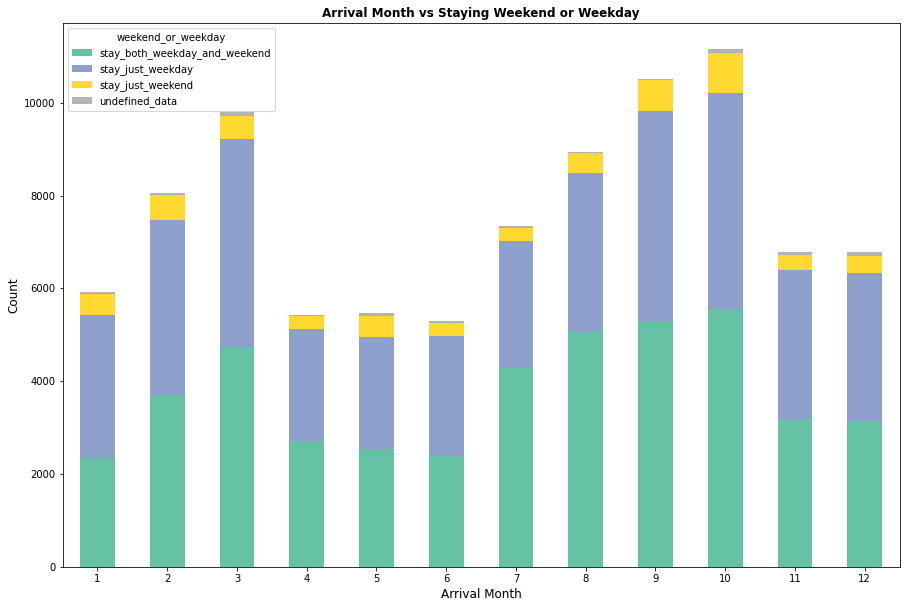

In [12]:
#`arrival_date_month` vs `weekend_or_weekday` graph 

hotel_data['arrival_date_month']= hotel_data['arrival_date_month'].astype('int64')
group_data = hotel_data.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Another feature engineering is made for `children` and `babies` features. Since, there is no obvious difference, these features gathered under the one feature which name is `all_children`.

In [13]:
# Create new feature:`all_children` with merge children and baby features

hotel_data['all_children'] = hotel_data['children'] + hotel_data['babies']
pd.crosstab(hotel_data['adults'], hotel_data['all_children'], margins=True, margins_name = 'Total').iloc[:10]

all_children,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,151,3,166,11,0,0,331
1,18685,182,102,5,1,0,18975
2,62446,3277,2225,60,0,2,68010
3,3791,334,25,0,0,0,4150
4,42,3,0,0,0,0,45
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


Below the donut pie graph shows the meal categories. There is a big difference in the `Bed&Breakfast` category and the others. Almost 80% of bookings reserved for `Bed&Breakfast`. 

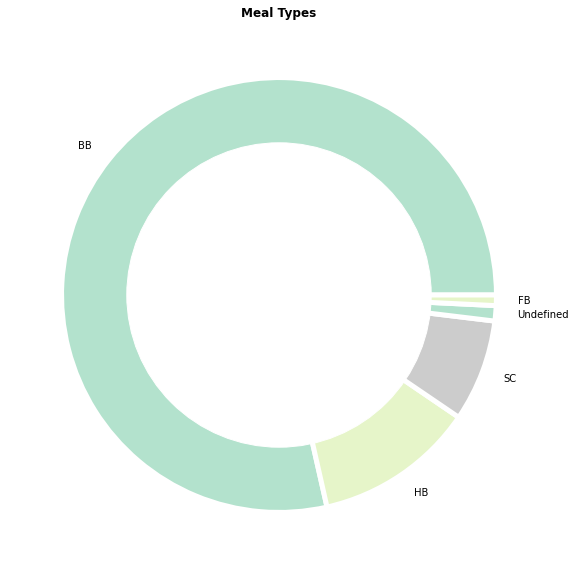

In [14]:
# `Meal` feature donut chart

meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = hotel_data['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

The below table shows frequency details about meal types according to the hotel types. Following the results, 67% of `Bed&Breakfast` booking made for `City Hotel` and almost every `Full Board` bookings made in the `Resort Hotel`.

In [15]:
# Groupby `Meal` and `Hotel` features
gr = hotel_data.groupby(['hotel','meal']).size()

group_meal_data = pd.DataFrame(gr/ gr.groupby(level=0).sum())
group_meal_data.applymap('{:.2f}'.format)

0
hotel        meal           
City Hotel   BB         0.80
             FB         0.00
             HB         0.08
             SC         0.11
Resort Hotel BB         0.76
             FB         0.02
             HB         0.19
             SC         0.00
             Undefined  0.03

In [16]:
group_meal_data = hotel_data.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.67,0.06,0.47,0.99,0.00
Resort Hotel,0.33,0.94,0.53,0.01,1.00


The below graph gives information about the location which bookings made in. According to that, there is an apparent difference in booking location between Portugal and the others. Approx. 40% of all bookings made in the same location: Portugal. 

Text(0, 0.5, 'Count')

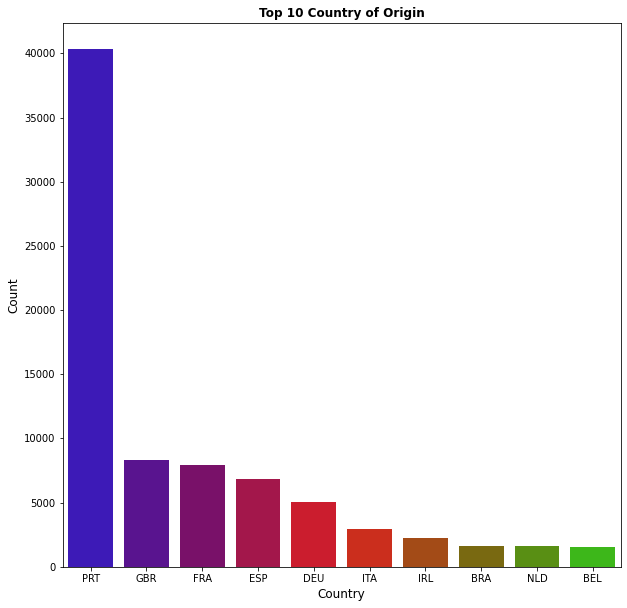

In [17]:
# Create Top 10 Country of Origin graph

plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotel_data, 
              order=pd.value_counts(hotel_data['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [18]:
pd.set_option('display.max_rows', 500)
hotel_data[["country", "is_canceled"]].groupby("country").agg({'country' : 'count', 'is_canceled' : 'mean'}).sort_values(by="is_canceled", ascending=False)

,country,is_canceled
country,,
KHM,2,1.000000
GGY,3,1.000000
GLP,2,1.000000
BEN,1,1.000000
VGB,1,1.000000
TJK,8,1.000000
HND,1,1.000000
HKG,18,1.000000
IMN,1,1.000000


The statistics show that online hotel and airline reservations are increased in recent years. Most people complete their reservation via their smartphones. The below graphs is summarise these statistics. More than 45% of bookings are made via `Online Travel Agents` and around 20% of bookings made via `Offline Travel Agents`. Less than 20% of bookings made directly without any agents. 

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

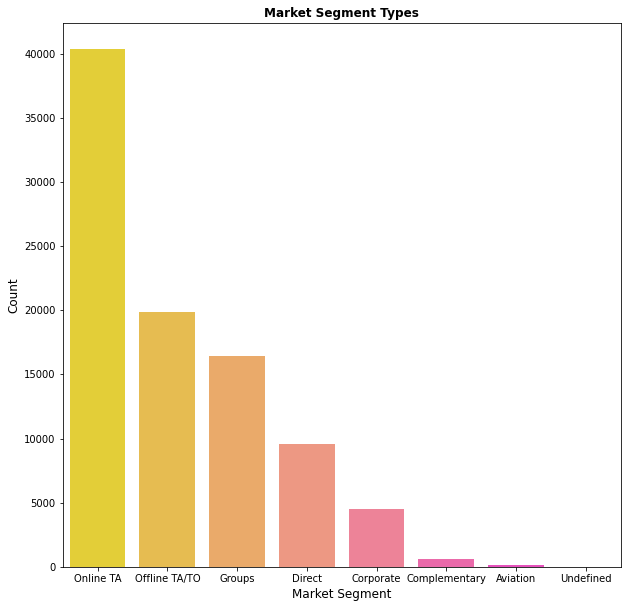

In [19]:
# `Market_segment` feature exploration

plt.figure(figsize=(10,10))
sns.countplot(hotel_data['market_segment'], palette='spring_r', 
              order=pd.value_counts(hotel_data['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

Below crosstable shows if there is any difference between assigned and reserved room types or not. The results are shown as a percentage. Average 84% of bookings keep their reserved room and the rest of the' rooms have been changed. Every row represents the reserved type and distribution over the columns shows what was the assigned room despite of reserved type.

In [20]:
# Reserved vs Assigned room types table

pd.crosstab(index = hotel_data['reserved_room_type'], 
            columns = hotel_data['assigned_room_type'],normalize='index').round(2)*100

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,84.0,1.0,2.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
B,6.0,92.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,0.0,92.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0
D,2.0,0.0,0.0,91.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,89.0,7.0,2.0,0.0,1.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,1.0,92.0,5.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,96.0,1.0,0.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0,0.0


Another exploratory analysis made for diving deep into the relationship between ADR and arrival month and booking cancellation status. As explained in the previous graph of `arrival month`, August is the most intense month of bookings. Besides the highest `Arrival Daily Rate` has ben occurred in that month too. Except for rush months like August, July, and September, canceled bookings have higher `ADR` than not canceled bookings. Maybe this highest rate could be one of the reasons for canceled bookings.

Text(0, 0.5, 'ADR')

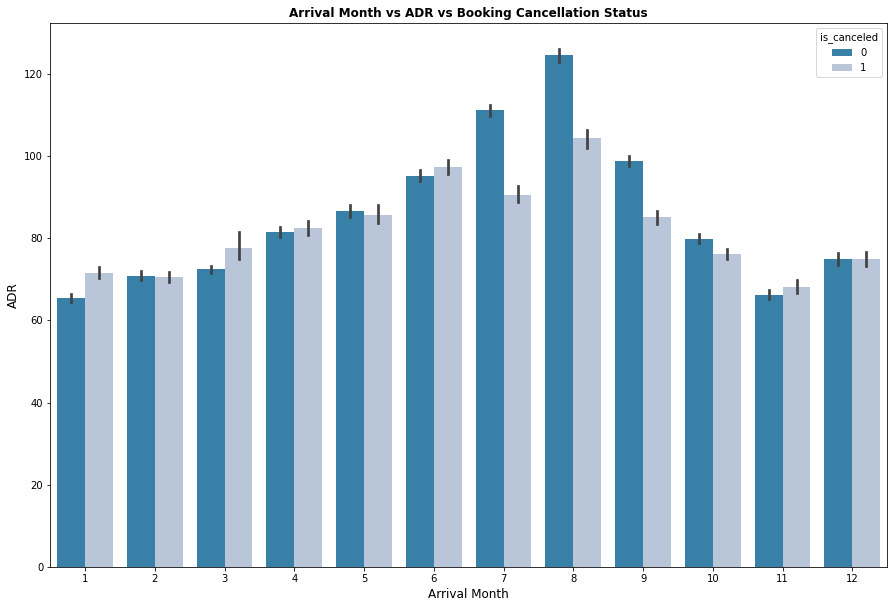

In [21]:
# `Arrival Month` vs `ADR` vs `Booking Cancellation Status`

hotel_data['adr'] = hotel_data['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=hotel_data)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

The below graph is about `Total Special Request` numbers. Around 55% of bookings do not have any special requests. 

Text(0, 0.5, 'Count')

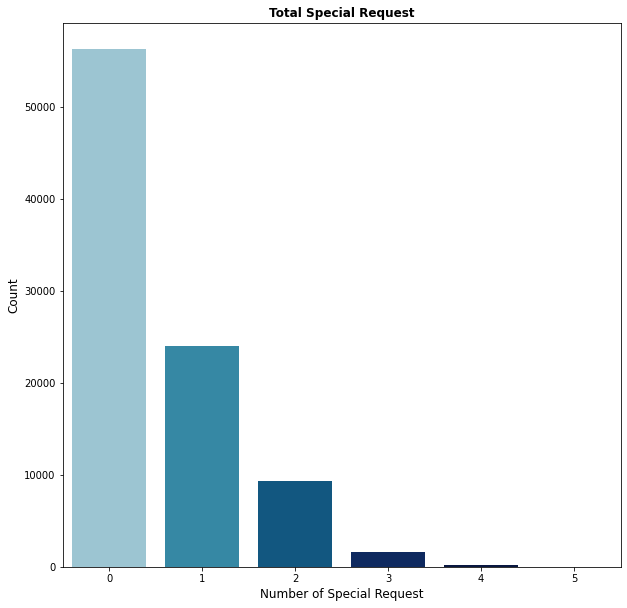

In [22]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=hotel_data, palette = 'ocean_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

The last graph is about the relationship between special requests and cancellation booking status. Nearly half bookings without any special requests have been canceled and another half of them have not been canceled. 

Text(0, 0.5, 'Count')

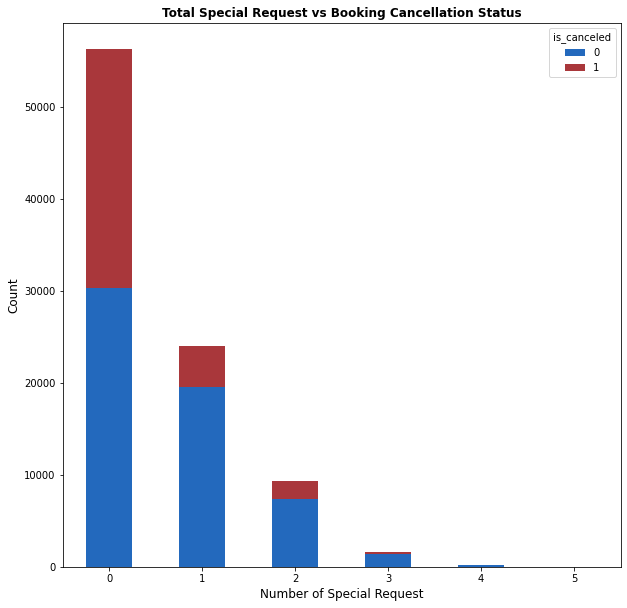

In [23]:
# Group by `total_of_special_requests` and `is_canceled` features

group_adr_request = hotel_data.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

## 2. Dealing with Missing Data and Correlation Matrix

In this part, first of all, any missing data will be checked.
The below code shows missing data for every feature. Such that, the `company` feature's 94% is missing. Because of that, this feature will be eliminated. On the other hand, the `children` and `all_children` features have only 4 missing data. This missing data will replace with zero. Another missing data has occurred in `country` and `agent` features. 
Since missing data of `country` is less than 1%, these data will replace with most frequent value. However, the `agent` missing features are more than the country. For this feature, missing data will be imputed as `0`. 

In [24]:
## Display sum of null data

hotel_data.isnull().sum()

ID                                    0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             468
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13217


In [25]:
# Fill missing data

hotel_data['children'] =  hotel_data['children'].fillna(0)
hotel_data['all_children'] =  hotel_data['all_children'].fillna(0)
hotel_data['country'] = hotel_data['country'].fillna(hotel_data['country'].mode().index[0])
hotel_data['agent']= hotel_data['agent'].fillna('0')
hotel_data=hotel_data.drop(['company'], axis =1)

In [26]:
# Change data structure

hotel_data['agent']= hotel_data['agent'].astype(int)
hotel_data['country']= hotel_data['country'].astype(str)

Another part is analyzing categorical features. Categorical labels converted into numerical form. This will help to be more understandable and implementable into machine learning algorithms. Some features are not ordinal such as `country`. In that case, *One-Hot Encoding* could be chosen. Due to the high number of categories, this method could incur higher computational cost. To help reducing that, Label Encoding method will be used.

In [27]:
#Using Label Encoder method for categorical features

labelencoder = LabelEncoder()
hotel_data['hotel'] = labelencoder.fit_transform(hotel_data['hotel'])
hotel_data['arrival_date_month'] = labelencoder.fit_transform(hotel_data['arrival_date_month'])
hotel_data['meal'] = labelencoder.fit_transform(hotel_data['meal'])
hotel_data['country'] = labelencoder.fit_transform(hotel_data['country'])
hotel_data['market_segment']= labelencoder.fit_transform(hotel_data['market_segment'])
hotel_data['distribution_channel']=labelencoder.fit_transform(hotel_data['distribution_channel'])
hotel_data['is_repeated_guest'] = labelencoder.fit_transform(hotel_data['is_repeated_guest'])
hotel_data['reserved_room_type'] = labelencoder.fit_transform(hotel_data['reserved_room_type'])
hotel_data['assigned_room_type'] = labelencoder.fit_transform(hotel_data['assigned_room_type'])
hotel_data['deposit_type'] = labelencoder.fit_transform(hotel_data['deposit_type'])
hotel_data['agent'] = labelencoder.fit_transform(hotel_data['agent'])
hotel_data['customer_type'] = labelencoder.fit_transform(hotel_data['customer_type'])
hotel_data['reservation_status'] = labelencoder.fit_transform(hotel_data['reservation_status'])
hotel_data['weekend_or_weekday'] = labelencoder.fit_transform(hotel_data['weekend_or_weekday'])

After encoding the categorical data, two data frames will be created. One data frame has only categorical data and another has numerical data. These two different data frames will be used to create a correlation matrix. *Spearman* method will be used for categorical data correlation matrix and *Pearson* method will be used for numerical one. 

In [28]:
#Create new dataframe for categorical data

hotel_data_categorical = hotel_data[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status', 
                                     'weekend_or_weekday']]
hotel_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91531 entries, 0 to 91530
Data columns (total 15 columns):
hotel                   91531 non-null int64
is_canceled             91531 non-null int64
arrival_date_month      91531 non-null int64
meal                    91531 non-null int64
country                 91531 non-null int64
market_segment          91531 non-null int64
distribution_channel    91531 non-null int64
is_repeated_guest       91531 non-null int64
reserved_room_type      91531 non-null int64
assigned_room_type      91531 non-null int64
deposit_type            91531 non-null int64
agent                   91531 non-null int64
customer_type           91531 non-null int64
reservation_status      91531 non-null int64
weekend_or_weekday      91531 non-null int64
dtypes: int64(15)
memory usage: 10.5 MB


In [29]:
#Create new dataframe for numerical data

hotel_data_numerical= hotel_data.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status',
                                       'weekend_or_weekday'], axis = 1)
hotel_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91531 entries, 0 to 91530
Data columns (total 19 columns):
ID                                91531 non-null int64
lead_time                         91531 non-null int64
arrival_date_year                 91531 non-null int64
arrival_date_week_number          91531 non-null int64
arrival_date_day_of_month         91531 non-null int64
stays_in_weekend_nights           91531 non-null int64
stays_in_week_nights              91531 non-null int64
adults                            91531 non-null int64
children                          91531 non-null float64
babies                            91531 non-null int64
previous_cancellations            91531 non-null int64
previous_bookings_not_canceled    91531 non-null int64
booking_changes                   91531 non-null int64
days_in_waiting_list              91531 non-null int64
adr                               91531 non-null float64
required_car_parking_spaces       91531 non-null int64
total_o

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

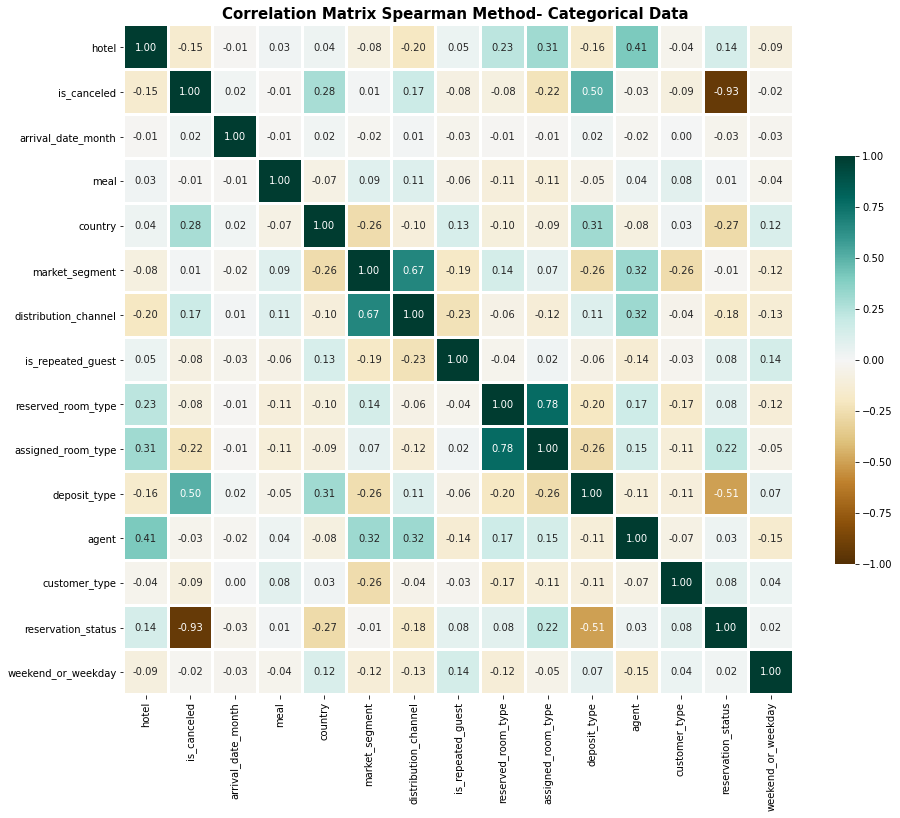

In [30]:
# Correlation Matrix with Spearman method

plt.figure(figsize=(15,15))
corr_categorical=hotel_data_categorical.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Pearson Method- Numerical Data ')

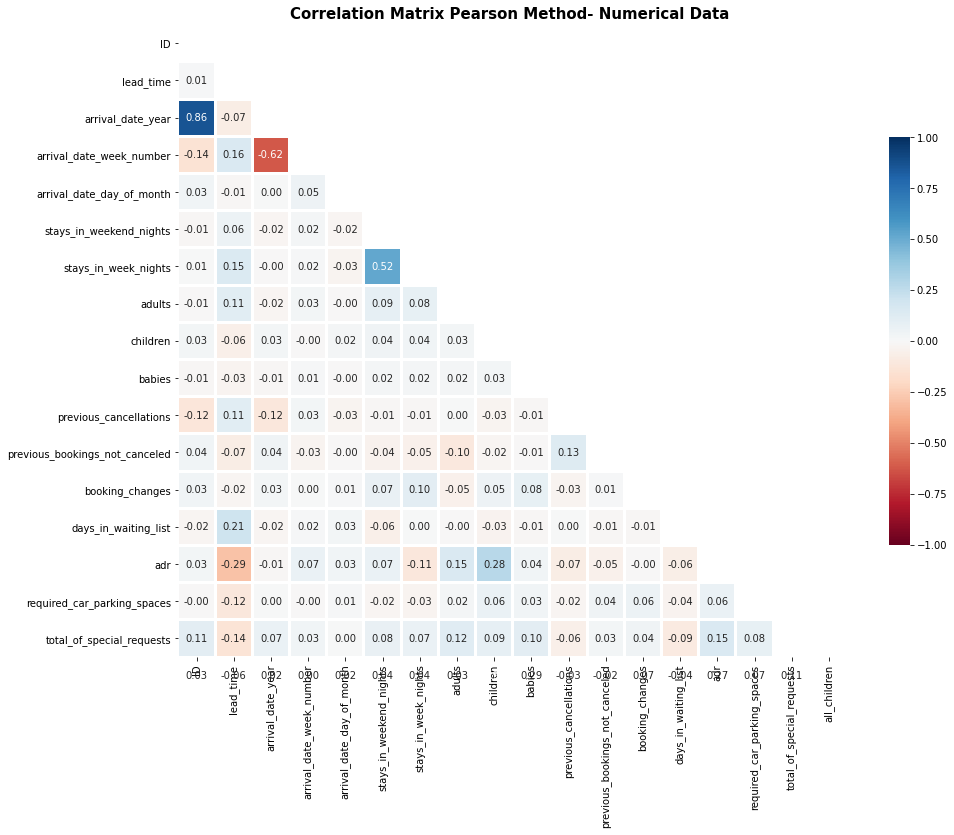

In [31]:
# Correlation Matrix with pearson method

plt.figure(figsize=(15,15))
corr_numerical=hotel_data_numerical.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

In [32]:
# Finding high correlated features

corr_mask_categorical = corr_categorical.mask(mask_categorical)
corr_values_categorical = [c for c in corr_mask_categorical.columns if any (corr_mask_categorical[c] > 0.90)]
corr_mask_numerical = corr_numerical.mask(mask_numerical)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_categorical, corr_values_numerical)

[] ['children']


The above correlation matrix shows positive or negative relationships between them. In those two heatmaps, the `reservation_ status` feature is drawn more attention because of its negative correlation with the `is_canceled` feature. The below table shows the relationship with details. This high correlation can cause a wrong prediction or overfitting. Prevent this situation, `reservation_status` feature will be eliminated. 

On the other hand, there is another high relationship between the `children` and the `all_children` features, since the `all_children` feature is constituted with the `children` and the `babies` features. Therefore the `children` feature will be eliminated too.

Last feature is `reservation_status_date`. Since this feature includes date type data and it could not convert another type, this feature will be eliminated. 

In [33]:
# `reservation_status` vs `is_canceled` table

pd.crosstab(columns = hotel_data['reservation_status'], index = hotel_data['is_canceled'],
           margins=True, margins_name = 'Total')

reservation_status,0,1,2,Total
is_canceled,,,,
0,0,58771,0,58771
1,31741,0,1019,32760
Total,31741,58771,1019,91531


In [34]:
#Dropping some features from data

hotel_data = hotel_data.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

In [35]:
#Copying data to used next parts

hotel_data_model = hotel_data

In [36]:
hotel_data_model.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'weekend_or_weekday', 'all_children'],
      dtype='object')

## 3. Hyperparameter Tunning and Feature Importance

In this part, optimum hyperparameters for several tree-based machine learning algorithms will be searched with the help of the `Grid Search Algorithm`. Hyperparameter tuning will help to make a prediction in the training part more accurately. Therefore, hyperparameters tunning will be fixed before the training process. 

Another important work is constituted Permutation Feature Importance graph with the `Extreme Gradient Boosting` algorithm. This technique calculates feature importance and performance metric be chosen as the basis of the accuracy score. This graph will help to understand features' contributed to prediction, provide insight into the dataset, and will help to find deemed non-important features if any. 

In [37]:
# Seperate target variable

hotel_data_tunning = hotel_data
y = hotel_data_tunning.iloc[:,1]
X = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)

In [38]:
## Finding parameters for XGBoost model

# model = XGBClassifier()
# parameters = {
# 'n_estimators' : [100,250,500],
# 'learning_rate' : [0.01, 0.1],
# 'subsample' :[0.5, 1.0],
# 'max_depth' : [3,5,7],
# 'criterion' : ['giny','entropy'],
# 'objective':['binary:logistic'],
# }

# grid_search = GridSearchCV(estimator=model, param_grid=parameters,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search.fit(X, y)
# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [39]:
## Finding parameters for RF model

# model_rfc_gs = RandomForestClassifier()
# parameters_rfc = {
# 'n_estimators' : [100,200,500],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,2,4,6]
# }

# grid_search_rfc = GridSearchCV(estimator=model_rfc_gs, param_grid=parameters_rfc,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search_rfc.fit(X, y)
# grid_search_rfc.best_params_

In [40]:
## Finding parameters for Extra Tree Classifier

# model_etc_gs = ExtraTreesClassifier()
# parameters_etc = {
# 'n_estimators' : [100,250,500],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,3,5,7]
# }

# grid_search_etc = GridSearchCV(estimator=model_etc_gs, param_grid=parameters_etc,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search_etc.fit(X, y)
# grid_search_etc.best_params_

In [41]:
## Finding parameters for Decision Tree

# model_dtc_gs = DecisionTreeClassifier()
# parameters_dtc = {
# 'criterion' : ['gini', 'entropy'],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,2,3,4,5],
# 'max_features' : ['auto', 'sqrt']
# }

# grid_search_dtc = GridSearchCV(estimator=model_dtc_gs, param_grid=parameters_dtc,
#                           cv=5, scoring='f1', verbose=True, n_jobs =-1)
# grid_search_dtc.fit(X, y)
# grid_search_dtc.best_params_

In [42]:
# Permutation Importance graph with XGB Classifier algorithm.

params = {
    'criterion': 'giny', 
    'learning_rate': 0.01, 
    'max_depth': 5,
    'n_estimators': 100, 
    'objective': 'binary:logistic', 
}
model = XGBClassifier(parameters=params)
# fit the model
model.fit(X, y)
# perform permutation importance
result = permutation_importance(model, X, y, scoring='accuracy', n_repeats = 5, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

In [43]:
# Feature scores table

for i,v in enumerate(sorted_idx):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 28.00000
Feature: 1, Score: 1.00000
Feature: 2, Score: 3.00000
Feature: 3, Score: 15.00000
Feature: 4, Score: 10.00000
Feature: 5, Score: 20.00000
Feature: 6, Score: 17.00000
Feature: 7, Score: 4.00000
Feature: 8, Score: 6.00000
Feature: 9, Score: 21.00000
Feature: 10, Score: 16.00000
Feature: 11, Score: 27.00000
Feature: 12, Score: 5.00000
Feature: 13, Score: 24.00000
Feature: 14, Score: 18.00000
Feature: 15, Score: 23.00000
Feature: 16, Score: 12.00000
Feature: 17, Score: 9.00000
Feature: 18, Score: 2.00000
Feature: 19, Score: 14.00000
Feature: 20, Score: 8.00000
Feature: 21, Score: 26.00000
Feature: 22, Score: 7.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 19.00000
Feature: 25, Score: 13.00000
Feature: 26, Score: 11.00000
Feature: 27, Score: 25.00000
Feature: 28, Score: 22.00000


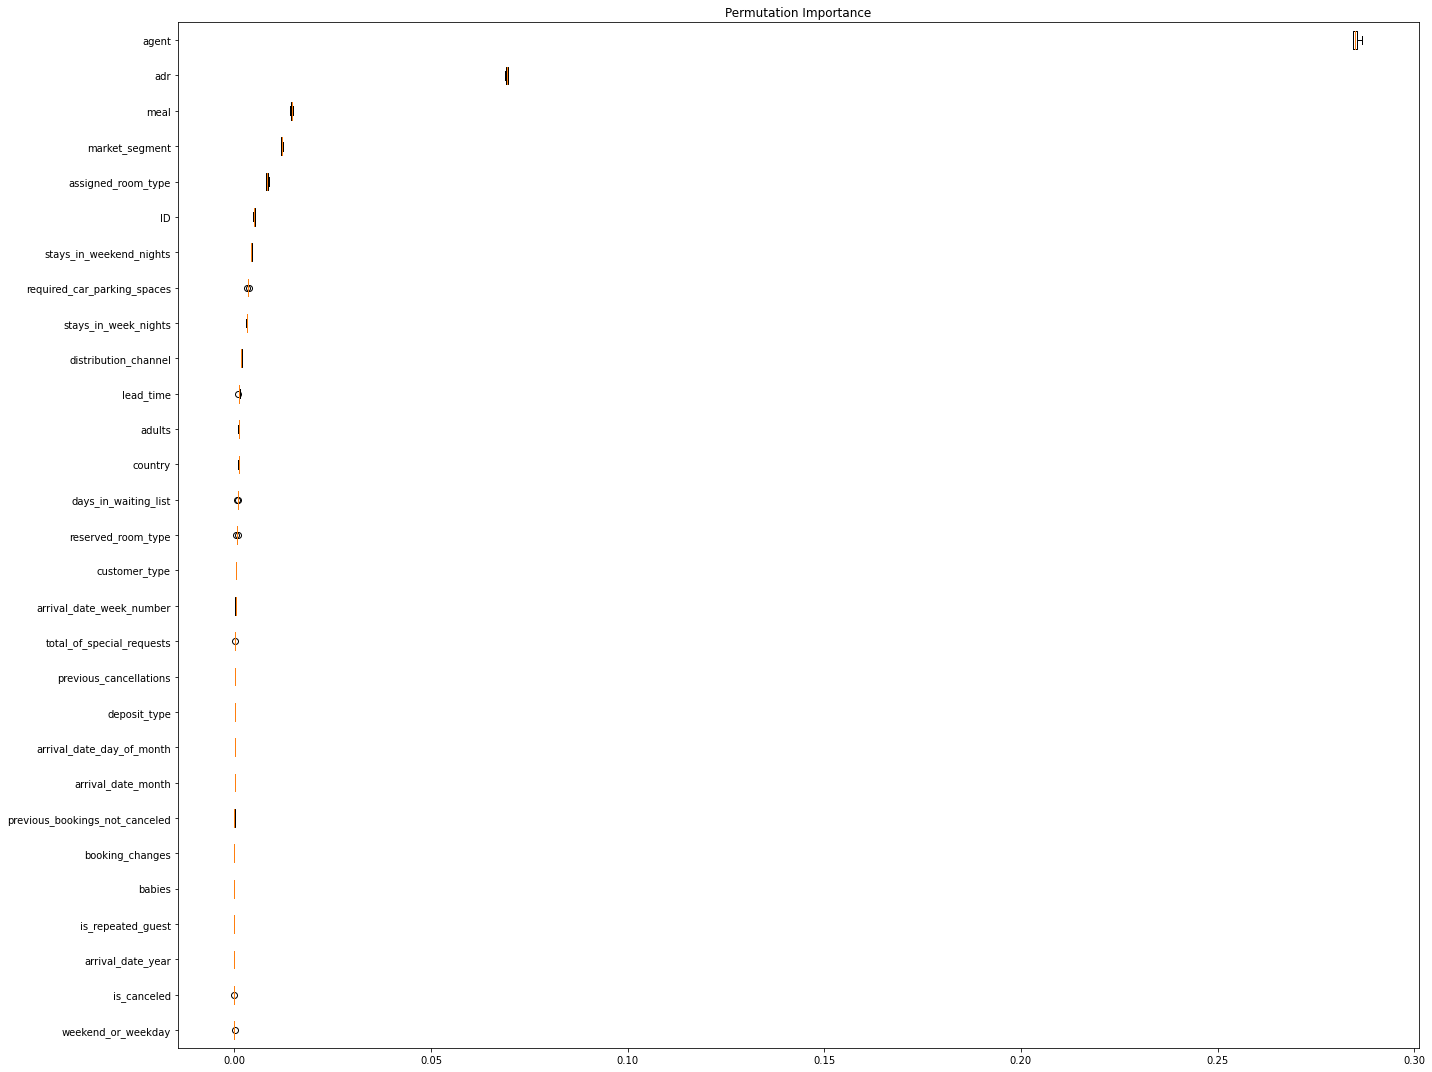

In [44]:
#Permutation Importance graph 

fig, ax = plt.subplots(figsize=(20,15))

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

The above graph shows the feature importance of the features. according to that, 1 out of 29 features are not being important to prediction which is `babies`. It will eliminated.

In [45]:
# Drop `baby` feature from data

hotel_data_model = hotel_data_model.drop(['babies'], axis=1)

## 4. Model Building

In this part, some tree-based algorithms have been used for model building. These are *Decision Tree*, *Random Forest*, *Extra Trees Classifier*, and *Extreme Gradient Boosting*. *Random Forest* and *Extra Tree Classification* algorithms have been chosen as bagging algorithms, `XGBoost` has been chosen as one of the boosting algorithms. *Decision Tree* algorithm has been chosen as one tree algorithm. 

Before model building, data will be split to train and test respectively 70% and 30% ratio. 
`X_train` and `X_test` data will be standardized with the *Standard Scaler* technique. After that, the *Stratified K-Fold Cross Validation* method will be used for resampling. Cross-validation is an important implementation to avoid overfitting. *Stratified K-Fold Cross Validation* method provides train/test indices to split data into train/test sets.
Model parameters have been defined in the previous part. 

In [60]:
# Seperate target variable for model building 

y_model = hotel_data_model.is_canceled
X_model = hotel_data_model.drop(["is_canceled", "adr"], axis=1)
y_model.describe()

count    91531.000000
mean         0.357912
std          0.479389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

In [61]:
X_model.isna().sum()

ID                                0
hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
weekend_or_weekday                0
all_children                

In [62]:
# Split to train and test with 70-30 ratio

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42, stratify=y)

In [63]:
# Implement standart scaler method

standardScalerX = StandardScaler()
X_train = standardScalerX.fit_transform(X_train)
X_test = standardScalerX.fit_transform(X_test)

In [64]:
# Stratified K-Fold Cross Validation Method

kfold_cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X_model,y_model):
    X_train, X_test = X_model.iloc[train_index], X_model.iloc[test_index]
    y_train, y_test = y_model.iloc[train_index], y_model.iloc[test_index]

In [65]:
# Decision Tree Model Building

dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4, max_features = 'auto')
# fit the model
dtc_model.fit(X_train, y_train)

#Predict Model
predict_dtc = dtc_model.predict(X_test)

In [66]:
# Random Forest Model Building

rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)

# fit the model
estimator= rf_model.fit(X_train, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test)

In [67]:
# Extra Treees Classsifier Model Building

etc_model = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split=2,
                                  n_estimators = 100)
# fit the model
etc_model.fit(X_train, y_train)

#Predict Model
predict_etc = etc_model.predict(X_test)

In [68]:
# Extreme Gradient Boosting Model Building

xgb_model = XGBClassifier(criterion = 'giny', learning_rate = 0.01, max_depth = 5, n_estimators = 100,
                          objective ='binary:logistic', subsample = 1.0)
# fit the model
xgb_model.fit(X_train, y_train)
#Predict Model
predict_xgb = xgb_model.predict(X_test)

## 5. Classification Reports and Classification Matrix

The last part is comparison of classification reports of ML models. 


First comparison the accuracy results. 
* Accuracy is a ratio of correct predictions to the total predictions.  
Its formula is $(TP+TN) / (TP+FP+FN+TN)$

According to that, *Random Forest* have the highest correct prediction with 88%. 
Another performance metrics explained below:

* Precision: It is the ratio of correctly predicted observation to the total positive predicted observation. 
Its formula is $TP / (TP+FP)$
* Recall: It is the ratio of correctly predicted positive observations to the actual positive observations.
Its formula is $TP / (TP+FN)$

*Random Forest*  and the *Extra Tree Classifier* share the highest precision ratios. It means that both models predicted around 88% of all the positive labels correctly.  On the other hand *Random Forest* has the highest recall ratio. It means that this model predicted 79% of actual positive observations correctly.

In [69]:
# Classification Reports 

print("RF", classification_report(y_test, predict_rf))
print("DTC",classification_report(y_test, predict_dtc))
print("ETC", classification_report(y_test, predict_etc))
print("XGB", classification_report(y_test, predict_xgb))

RF               precision    recall  f1-score   support

           0       0.89      0.95      0.92     11754
           1       0.90      0.79      0.84      6552

    accuracy                           0.89     18306
   macro avg       0.90      0.87      0.88     18306
weighted avg       0.89      0.89      0.89     18306

DTC               precision    recall  f1-score   support

           0       0.87      0.92      0.90     11754
           1       0.84      0.76      0.80      6552

    accuracy                           0.86     18306
   macro avg       0.86      0.84      0.85     18306
weighted avg       0.86      0.86      0.86     18306

ETC               precision    recall  f1-score   support

           0       0.86      0.96      0.91     11754
           1       0.92      0.73      0.81      6552

    accuracy                           0.88     18306
   macro avg       0.89      0.85      0.86     18306
weighted avg       0.88      0.88      0.88     18306

XGB     

Text(570.5454545454544, 0.5, 'Actual Labels')

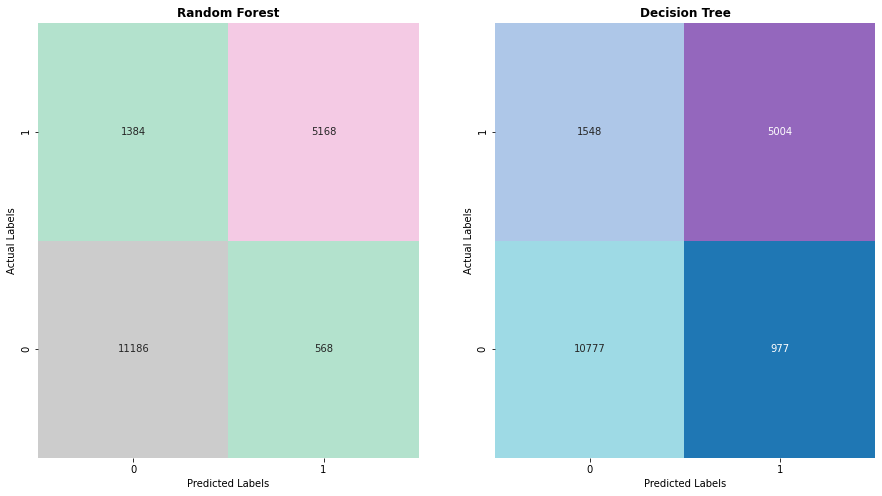

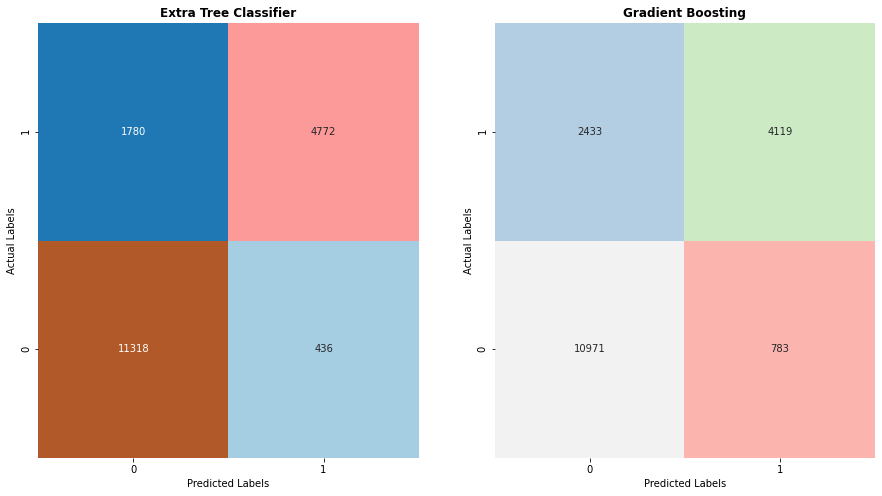

In [70]:
# Confusion Matrix 

DTC_matrix = confusion_matrix(y_test, predict_dtc)
RF_matrix = confusion_matrix(y_test, predict_rf)
ETC_matrix = confusion_matrix(y_test, predict_etc)
XGB_matrix = confusion_matrix(y_test, predict_xgb) 

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(RF_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([0,2])
ax[0].set_title("Random Forest", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
sns.heatmap(DTC_matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20", ax = ax[1]).set_ylim([0,2])
ax[1].set_title("Decision Tree", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')

fig, axe = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(ETC_matrix,annot=True, fmt="d", cbar=False, cmap="Paired", ax = axe[0]).set_ylim([0,2])
axe[0].set_title("Extra Tree Classifier", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
sns.heatmap(XGB_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel1", ax = axe[1]).set_ylim([0,2])
axe[1].set_title("Gradient Boosting", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')

**Any feedback is welcome, please be generous to share your feedbacks**